In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader.data as web
from pandas_datareader.data import DataReader
import datetime
from statsmodels.tsa.stattools import adfuller

/Users/guapofish/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [26]:
df = pd.read_csv('/Users/guapofish/Desktop/ciss_cal.csv')
df.Date = pd.to_datetime(df['Date'])
df.set_index('Date',inplace = True)


In [27]:
def MarkovAR(ts, lag, k, dr):
    '''
    [Input] 
    ###     ts : time series of CISS, type: pandas.series
    ###    lag : the lag order in Auto Regression 
    ###      k : number of regimes in the Markov Chain
    ###     dr : bool, whether the slope coefficient vary across the regimes
    '''
    initial_3 = [0.8,
           0.2,
           0.01,
           0.15,
           0.7,
           0.4,
           0.2,
           0.5,
           0.8,
           0.001,
           0.018,
           0.148,
           0.7,
           0.5,
           0.4]
    #m = sm.tsa.MarkovAutoregression(endog = ts, k_regimes = k, order = lag, trend='c', 
    #                                switching_ar = dr, switching_trend=True, switching_variance = True)
    m = sm.tsa.MarkovRegression(endog = ts, k_regimes = k, order = lag,trend='nc',switching_variance = True)
    #f = m.fit(start_params=initial_3, search_reps=10, search_scale=5)
    f = m.fit()
    return f

In [28]:
def Markovauto(ts, lag, k):
    '''
    [Input] 
    ###     ts : time series of CISS, type: pandas.series
    ###    lag : the lag order in Auto Regression 
    ###      k : number of regimes in the Markov Chain
    ###     dr : bool, whether the slope coefficient vary across the regimes
    '''
    initial_3 = [0.8,
           0.2,
           0.01,
           0.15,
           0.7,
           0.4,
           0.2,
           0.5,
           0.8,
           0.001,
           0.018,
           0.148,
           0.7,
           0.5,
           0.4]
    #m = sm.tsa.MarkovAutoregression(endog = ts, k_regimes = k, order = lag, trend='c', 
    #                                switching_ar = dr, switching_trend=True, switching_variance = True)
    m = sm.tsa.MarkovAutoregression(endog = ts, k_regimes = k, order = lag)
    #f = m.fit(start_params=initial_3, search_reps=10, search_scale=5)
    f = m.fit()
    return f

In [29]:
d = pd.read_csv('/Users/guapofish/Desktop/ciss_cal.csv')

In [30]:
def get_smooth_prob(res, k):
    '''
    [Input] 
    ###   k : number of regimes
    ### res : fit result of the MSA (Markov Swithcing Autoregression) model
    '''
    df_p = pd.DataFrame()
    for i in range(k):#regime):
        df_p['Regime %d'   %i] = res.smoothed_marginal_probabilities[i]
    return df_p

In [31]:
res = MarkovAR(df, 1, 3, True) 
df_p = get_smooth_prob(res, 3)
df_p.dropna().head()

/Users/guapofish/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,Regime 0,Regime 1,Regime 2
Date,,,
1999-01-08,3.852265e-04,0.990412,0.009203
1999-01-10,5.304400e-05,0.993255,0.006692
1999-01-15,2.932417e-12,0.993949,0.006051
1999-01-22,2.587317e-08,0.996356,0.003644
1999-01-29,4.685922e-05,0.998371,0.001582


In [32]:
res.summary()

/Users/guapofish/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/guapofish/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/guapofish/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/guapofish/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:        Calculated CISS   No. Observations:                 1377
Model:               MarkovRegression   Log Likelihood                1250.889
Date:                Wed, 22 Apr 2020   AIC                          -2483.777
Time:                        23:16:49   BIC                          -2436.728
Sample:                             0   HQIC                         -2466.175
                               - 1377                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0009      0.000      3.577      0.000       0.000       0.001
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0091      0.001     14.414      0.000       0.008       0.010
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1095      0.011     10.296      0.000       0.089       0.130
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9762      0.011     89.497      0.000       0.955       0.998
p[1->0]        0.0082      0.004      2.104      0.035       0.001       0.016
p[2->0]     6.782e-16        nan        nan        nan         nan         nan
p[0->1]        0.0223      0.013      1.753      0.080      -0.003       0.047
p[1->1]        0.9861      0.005    205.228      0.000       0.977       0.996
p[2->1]        0.0189      0.009      2.047      0.041       0.001       0.037
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [33]:
def get_current_state(df_p):
    df_p['Regime'] = df_p.idxmax(axis=1)
    return df_p['Regime']

In [34]:
state = get_current_state(df_p)
#State = pd.DataFrame(state.dropna())


In [35]:
regime0_period = df_p.loc[df_p.Regime == 'Regime 0']
regime0_period.head() 

,Regime 0,Regime 1,Regime 2,Regime
Date,,,,
2004-05-21,0.622134,0.377853,0.000013,Regime 0
2004-05-28,0.800655,0.199340,0.000006,Regime 0
2004-06-02,0.906959,0.093038,0.000003,Regime 0
2004-06-04,0.948052,0.051946,0.000002,Regime 0
2004-06-08,0.966565,0.033434,0.000001,Regime 0


In [36]:
regime1_period = df_p.loc[df_p.Regime == 'Regime 1']
regime1_period.head() 

,Regime 0,Regime 1,Regime 2,Regime
Date,,,,
1999-01-08,3.852265e-04,0.990412,0.009203,Regime 1
1999-01-10,5.304400e-05,0.993255,0.006692,Regime 1
1999-01-15,2.932417e-12,0.993949,0.006051,Regime 1
1999-01-22,2.587317e-08,0.996356,0.003644,Regime 1
1999-01-29,4.685922e-05,0.998371,0.001582,Regime 1


In [37]:
regime2_period = df_p.loc[df_p.Regime == 'Regime 2']
regime2_period.head() 

,Regime 0,Regime 1,Regime 2,Regime
Date,,,,
2007-07-09,4.178495e-09,0.460688,0.539312,Regime 2
2007-07-12,3.721416e-19,0.375202,0.624798,Regime 2
2007-07-13,1.994633e-05,0.368504,0.631476,Regime 2
2007-07-20,4.579007e-05,0.345571,0.654383,Regime 2
2007-07-27,4.735322e-08,0.282010,0.717990,Regime 2


In [38]:
'''
quandl.ApiConfig.api_key = "Ufux_HxUXZKAgFjxWhGi"
quandl.bulkdownload("EOD")

import zipfile
zip_ref = zipfile.ZipFile("EOD.zip", "r")
zip_ref.extractall()
zip_ref.close()

import datetime
file_date = str(datetime.datetime.now())[:10]
file_name = 'EOD_' + file_date[0:4] + file_date[5:7] + file_date[8:] + '.csv'
dp = pd.read_csv(file_name)

dp.columns = ['ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Volumn',
              'Dividend', 'Split', 'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close',
              'Adj_Volumn']
dp.head()

'''


'\nquandl.ApiConfig.api_key = "Ufux_HxUXZKAgFjxWhGi"\nquandl.bulkdownload("EOD")\n\nimport zipfile\nzip_ref = zipfile.ZipFile("EOD.zip", "r")\nzip_ref.extractall()\nzip_ref.close()\n\nimport datetime\nfile_date = str(datetime.datetime.now())[:10]\nfile_name = \'EOD_\' + file_date[0:4] + file_date[5:7] + file_date[8:] + \'.csv\'\ndp = pd.read_csv(file_name)\n\ndp.columns = [\'ticker\', \'Date\', \'Open\', \'High\', \'Low\', \'Close\', \'Volumn\',\n              \'Dividend\', \'Split\', \'Adj_Open\', \'Adj_High\', \'Adj_Low\', \'Adj_Close\',\n              \'Adj_Volumn\']\ndp.head()\n\n'

In [42]:
#!pip install fix_yahoo_finance

  Using cached fix-yahoo-finance-0.1.37.tar.gz (6.3 kB)
  Created wheel for fix-yahoo-finance: filename=fix_yahoo_finance-0.1.37-py3-none-any.whl size=7058 sha256=909ed333b6573ac3ee9a0c983c5f334c8f661f50e13e12914b43c68d662cab12
  Stored in directory: /Users/guapofish/Library/Caches/pip/wheels/1a/41/80/6cd5c10b88a3546cbe4cb412633ef2d12906510c403f723676
Successfully built fix-yahoo-finance


In [39]:
import quandl
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import datetime
quandl.ApiConfig.api_key = 'Ufux_HxUXZKAgFjxWhGi'

ticker_list = ['AAPL']

# data1 is the data from quandl
data1 = quandl.get_table('WIKI/PRICES', ticker = ticker_list,
                             qopts = { 'columns': ['ticker', 'Date', 'adj_close'] },
                             Date = { 'gte': '1999-01-08', 'lte': '2019-08-16' },
                             paginate=True)

data1 = data1[['date','adj_close']]
data1.rename(columns={'date':'Date'},inplace=True)
data1.rename(columns={'adj_close':'Adj Close1'},inplace=True)
data1.Date = pd.to_datetime(data1['Date'])
data1.set_index('Date',inplace=True)
data1.sort_index(ascending=True, inplace=True)

# data2 is the data from Yahoofinance 
#yf.pdr_override()
stocks = ticker_list
start = datetime.datetime(2019,8,17)
end = datetime.datetime(2020,4,22)
f = pdr.get_data_yahoo(stocks, start=start, end=end)
data2 = f[['Adj Close']].reset_index().dropna()
data2.Date = pd.to_datetime(data2['Date'])
data2.set_index('Date',inplace=True)

data = pd.concat([data1,data2], axis=1)
data = pd.DataFrame(data['Adj Close'].fillna(data['Adj Close1']))
data['Adj Close'] = data['Adj Close'].pct_change()
data = data.dropna()
data.head()

,Adj Close
Date,
1999-01-11,0.019556
1999-01-12,0.005449
1999-01-13,0.008021
1999-01-14,-0.110108
1999-01-15,-0.001692


In [40]:
df = pd.concat([data['Adj Close'],df_p.Regime], axis=1)
df.Regime.fillna(method='bfill', inplace=True) 
df.dropna(inplace=True)    #regime swithing day might not be a trading day
df.head()

,Adj Close,Regime
Date,,
1999-01-11,0.019556,Regime 1
1999-01-12,0.005449,Regime 1
1999-01-13,0.008021,Regime 1
1999-01-14,-0.110108,Regime 1
1999-01-15,-0.001692,Regime 1


In [58]:
df.groupby([df.index.map(lambda t: t.year), 'Regime']).mean()


Adj Close
Date Regime             
1999 Regime 1   0.004028
2000 Regime 1  -0.003089
2001 Regime 1   0.002328
2002 Regime 1  -0.001212
2003 Regime 1   0.001853
2004 Regime 0   0.005815
     Regime 1   0.002954
2005 Regime 0   0.003490
2006 Regime 0   0.001751
     Regime 1  -0.001082
2007 Regime 0   0.000315
     Regime 1   0.004179
     Regime 2   0.003817
2008 Regime 2  -0.002646
2009 Regime 1   0.001364
     Regime 2   0.004228
2010 Regime 1   0.002227
     Regime 2   0.000150
2011 Regime 1   0.000660
     Regime 2   0.001180
2012 Regime 1   0.000557
     Regime 2   0.007185
2013 Regime 0   0.002307
     Regime 1  -0.000716
2014 Regime 0   0.001345
     Regime 1   0.001800
2015 Regime 1   0.000020
2016 Regime 1   0.000631
     Regime 2   0.000044
2017 Regime 0   0.001210
     Regime 1   0.002002
2018 Regime 0   0.000854
     Regime 1  -0.000694
2019 Regime 1   0.001951

In [42]:
df.groupby([df.index.map(lambda t: t.year), 'Regime']).count().hea

,,Adj Close
Date,Regime,
1999,Regime 1,247
2000,Regime 1,252
2001,Regime 1,248
2002,Regime 1,252
2003,Regime 1,252


In [43]:
def f(x):
    a = x['Adj Close'].add(1).cumprod()
    a.iat[0] = 1
    return a


In [37]:
t0 = aapl.groupby(['Regime']).apply(f)
Regime0_invest_df = pd.DataFrame(t0.loc[['Regime 0']])
Regime0_invest_df.tail()

Adj Close
Regime   Date                 
Regime 0 2018-04-30  11.673027
         2018-05-01  11.944264
         2018-05-02  12.471902
         2018-05-03  12.494505
         2018-05-04  12.984709

In [36]:
t1 = aapl.groupby(['Regime']).apply(f)
Regime1_invest_df = pd.DataFrame(t1.loc[['Regime 1']])
Regime1_invest_df.tail()

Adj Close
Regime   Date                 
Regime 1 2019-08-12   4.720301
         2019-08-13   4.920198
         2019-08-14   4.773748
         2019-08-15   4.749968
         2019-08-16   4.862042

In [35]:
t2 = aapl.groupby(['Regime']).apply(f)
Regime2_invest_df = pd.DataFrame(t2.loc[['Regime 2']])
Regime2_invest_df.tail()

Adj Close
Regime   Date                 
Regime 2 2016-07-11   2.221159
         2016-07-12   2.231236
         2016-07-13   2.218639
         2016-07-14   2.262613
         2016-07-15   2.262384

Text(0.5, 1.0, '$1 cum ret of AAPL base on three states of Regime .....')

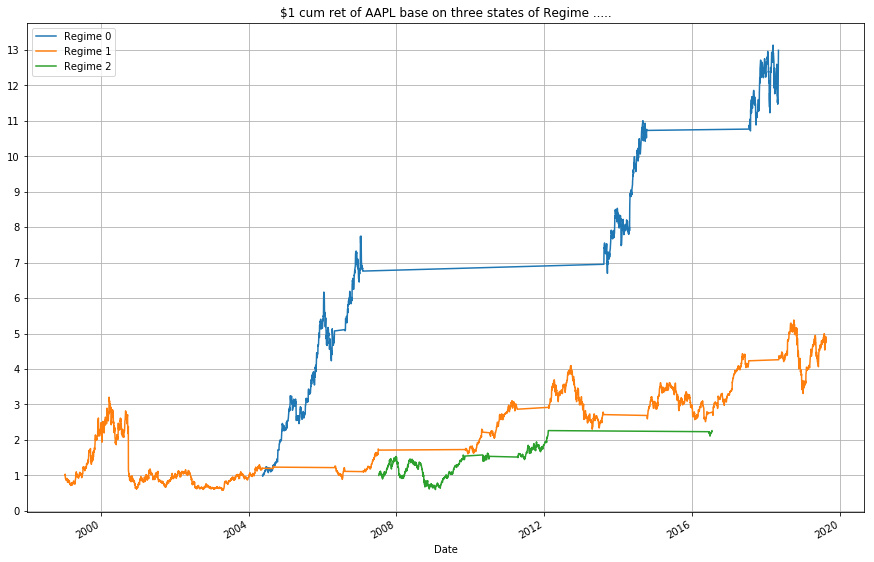

In [38]:
t0.xs('Regime 0').plot(figsize = (15,10))
t1.xs('Regime 1',).plot(figsize = (15,10))
t2.xs('Regime 2').plot(figsize = (15,10))
plt.legend(['Regime 0', 'Regime 1','Regime 2'])
plt.yticks(np.arange(0, 14, 1.0))
plt.grid()
plt.title('$1 cum ret of AAPL base on three states of Regime .....') #没想好
##X轴可以在修改一下变好看点

In [ ]:
#t = pd.concat([close_price.loc[regime0_period.index[0]:regime0_period.index[1]],
#        close_price.loc[regime0_period.index[1]:regime0_period.index[2]]])
#t.drop_duplicates(inplace=True)


In [ ]:
# def get_current_state(df_p):
#     p_cur = list(df_p.iloc[-1])
#     return p_cur.index(max(p_cur))

# Only need to implement the following function

def CISS_to_signal(CISS):
    '''
    [Input] 
    ###   CISS : time series of CISS, type: pandas.series
    
    [Output] 
    ###  signal : trading signal, whose value is among (-1,0,1)
    ############ If the output is -1, then it's a short signal. 
    ############ If the output is 1, then it's a long signal.
    ############ If the output is 0, then it's a signal for non-trading.
    '''
    res = MarkovAR(CISS, 1, 3, True)   # use the best model
    df_p = get_smooth_prob(res, k)
    state = get_current_state(df_p)
    # state:trading decision
    mapping = {0:1, 1:0, 2:-1}
    signal = mapping[state]
    return signal